In [37]:
from hpo import HPOApi
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

hpo = HPOApi()

In [56]:
with open("suid_output.csv") as f:
    gene_ids = [line.strip() for line in f.readlines()[1:]]

gene_searches = []

for id in gene_ids:
    try:
        gene_searches.append(hpo.gene_search(id))
    except:
        pass

In [14]:
diseases = ["ORPHA:324581", "ORPHA:1369", "ORPHA:2020", "ORPHA:98905", "ORPHA:424107", "OMIM:255300", "OMIM:618823", "OMIM:618654", "OMIM:255995", "OMIM:612540", "OMIM:618578", "OMIM:618975", "OMIM:618414", "OMIM:255310", "OMIM:300580", "OMIM:618822", "OMIM:618524", "OMIM:613076", "ORPHA:171430"]
disease_hit = [hpo.disease_search(disease) for disease in diseases]

In [51]:
terms = set()
for disease in disease_hit:
    for term_category in disease.terms:
        for term in term_category.terms:
            terms.add(term.ontology_id)


Traceback (most recent call last):
  File "_pydevd_bundle/pydevd_cython.pyx", line 1063, in _pydevd_bundle.pydevd_cython.PyDBFrame.trace_dispatch
  File "_pydevd_bundle/pydevd_cython.pyx", line 297, in _pydevd_bundle.pydevd_cython.PyDBFrame.do_wait_suspend
  File "C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\debugpy\_vendored\pydevd\pydevd.py", line 1937, in do_wait_suspend
    keep_suspended = self._do_wait_suspend(thread, frame, event, arg, suspend_type, from_this_thread, frames_tracker)
  File "C:\Users\Sam\AppData\Local\Programs\Python\Python38\lib\site-packages\debugpy\_vendored\pydevd\pydevd.py", line 1972, in _do_wait_suspend
    time.sleep(0.01)
KeyboardInterrupt


KeyboardInterrupt: 

In [52]:
to_plot = {gene.gene_symbol: [term.ontology_id for term in gene.terms] for gene in gene_searches}

In [50]:
values = list(set([ x for y in to_plot.values() for x in y]))
data = {}
for key in to_plot.keys():
    data[key] = [ 1 if value in to_plot[key] else 0 for value in values ]

df = pd.DataFrame(data, index=values).transpose()
filtered_df = df.filter(items=list(terms))
filtered_df = filtered_df.loc[~(filtered_df==0).all(axis=1)]
filtered_df

,HP:0003202,HP:0002093,HP:0001349,HP:0002792,HP:0001425,HP:0001265,HP:0003323,HP:0007514,HP:0012416,HP:0002460,...,HP:0030319,HP:0001761,HP:0001609,HP:0009004,HP:0000597,HP:0000508,HP:0002705,HP:0000054,HP:0001635,HP:0001508
TPM3,1,1,1,1,1,1,1,0,1,0,...,1,1,1,1,0,1,1,0,0,1
TPM2,1,1,1,1,1,1,1,0,1,0,...,1,1,1,1,0,1,0,0,0,1
ACTN2,0,1,0,1,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
TNNT1,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MYH7,0,1,0,1,1,0,1,0,0,1,...,1,1,0,0,0,1,0,0,1,1
MYH2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
KCNA5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ACTA1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,1,1,1,0,1


<AxesSubplot:>

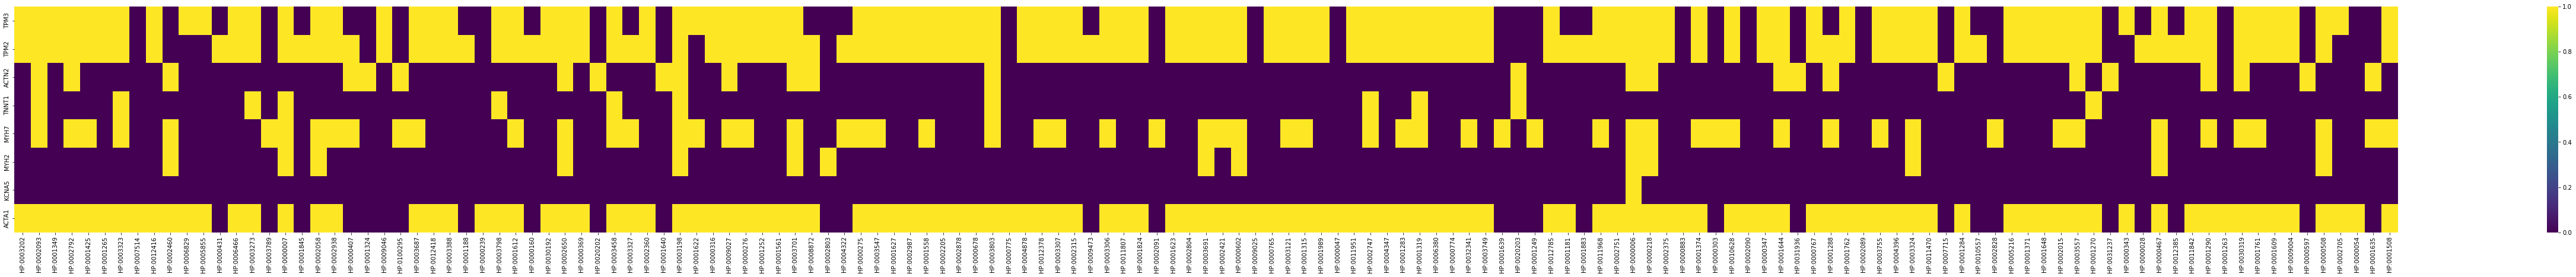

In [48]:
fig, ax = plt.subplots(figsize=(90,7))
sns.heatmap(filtered_df, cmap="viridis")


In [49]:
adjacency = filtered_df.dot(df.transpose())
fig, ax = plt.subplots(figsize=(90,7))
sns.heatmap(adjacency, cmap="viridis")

ValueError: matrices are not aligned